# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [3]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [4]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [5]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [6]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=42)

In [7]:
print(y_train.shape)
print(X_test[30,:].reshape(28,28))
print(X)
print(y)

(60000,)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

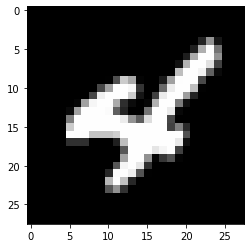

In [8]:
#_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
#plt.imshow(y)
#ax.set_axis_off()
plt.imshow(X_train[30,:].reshape(28,28), cmap='gray')

In [9]:
y_train[30]

'4'

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Create gaussian regression object
gnb = GaussianNB()
# Train the model using the training sets
gnb.fit(X_train, y_train)
# Make predictions using the testing set
gnb_y_pred = gnb.predict(X_train)

print(accuracy_score(y_train, gnb_y_pred))
print(confusion_matrix(y_train, gnb_y_pred))

0.5571666666666667
[[5319    9   32   20    9   13  187    2  209  120]
 [   2 6327   15   28    3   12   83    2  169   84]
 [ 498  149 1913  373   19   29 1549   20 1365  108]
 [ 363  292   56 2186    8   14  340   47 2093  708]
 [ 162   35   49   35  821   46  601   32 1220 2917]
 [ 635  131   31  121   21  262  312   11 3243  609]
 [  49   90   30    2    4   23 5592    0  118    7]
 [  25   41   10   53   42    8   21 1803  190 4045]
 [  93  719   32   45   14   34  103    9 3583 1224]
 [  34   33   14   10   27    6    4   76   94 5624]]


In [12]:
# Create linear regression object
regr = linear_model.SGDClassifier(loss='log')

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
regr_y_pred = regr.predict(X_train)

print(accuracy_score(y_train, regr_y_pred))
print(confusion_matrix(y_train, regr_y_pred))

0.8859
[[5263    1  251   32    1   43  148    2  161   18]
 [   1 6532   69   10    2    8   22    9   52   20]
 [   3   19 5732   29   24    6   88   26   84   12]
 [   0   13  433 5206    7   84   58   30  186   90]
 [   2   15   92   31 4505   10  177   33  131  922]
 [  12   29  100  233   18 4230  243   52  356  103]
 [   7    6   31    2    4   32 5803    2   27    1]
 [   7   21  228   20   36    6    8 5571   29  312]
 [   5   82  432   91    9   81  114   21 4877  144]
 [   6   18   91   75   35   29    5  151   77 5435]]


In [13]:
# Create Random Forest regression object
clf = RandomForestClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Make predictions using the testing set
clf_y_pred = clf.predict(X_train)

print(accuracy_score(y_train, clf_y_pred))
print(confusion_matrix(y_train, clf_y_pred))

1.0
[[5920    0    0    0    0    0    0    0    0    0]
 [   0 6725    0    0    0    0    0    0    0    0]
 [   0    0 6023    0    0    0    0    0    0    0]
 [   0    0    0 6107    0    0    0    0    0    0]
 [   0    0    0    0 5918    0    0    0    0    0]
 [   0    0    0    0    0 5376    0    0    0    0]
 [   0    0    0    0    0    0 5915    0    0    0]
 [   0    0    0    0    0    0    0 6238    0    0]
 [   0    0    0    0    0    0    0    0 5856    0]
 [   0    0    0    0    0    0    0    0    0 5922]]


### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [14]:
from sklearn.metrics import f1_score

In [15]:
gnb_y_pred_test = gnb.predict(X_test)
print('accuracy_score =',accuracy_score(y_test, gnb_y_pred_test))
print('f1_score =',f1_score(y_test, gnb_y_pred_test,average='macro'))

accuracy_score = 0.5604
f1_score = 0.5092207842748325


In [16]:
regr_y_pred_test = regr.predict(X_test)
print('accuracy_score =',accuracy_score(y_test, regr_y_pred_test))
print('f1_score =',f1_score(y_test, regr_y_pred_test,average='macro'))

accuracy_score = 0.8709
f1_score = 0.8684593730139551


In [17]:
clf_y_pred_test = clf.predict(X_test)
print('accuracy_score =',accuracy_score(y_test, clf_y_pred_test))
print('f1_score =',f1_score(y_test, clf_y_pred_test,average='macro'))

accuracy_score = 0.968
f1_score = 0.9677705816647624


In [18]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve



No handles with labels found to put in legend.


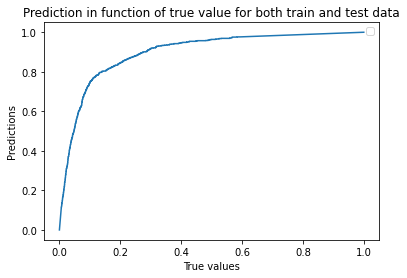

In [25]:
probs = gnb.predict_proba(X_test)[:,5]
fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label='5')
plt.plot(fpr, tpr)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('Prediction in function of true value for both train and test data')
plt.legend();
plt.show()

No handles with labels found to put in legend.


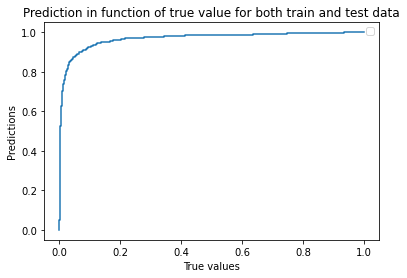

In [26]:
probs = regr.decision_function(X_test)[:,5]
fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label='5')
plt.plot(fpr, tpr)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('Prediction in function of true value for both train and test data')
plt.legend();
plt.show()

No handles with labels found to put in legend.


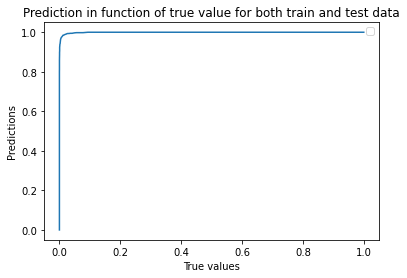

In [27]:
probs = clf.predict_proba(X_test)[:,5]
fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label='5')
plt.plot(fpr, tpr)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('Prediction in function of true value for both train and test data')
plt.legend();
plt.show()